In [1]:
import numpy as np

import matplotlib.pyplot as plt

import ai_prentice_wasserstein
import utils

In [2]:
kepler_problem_data = np.load("trajectories/kepler_problem.npz")
data = kepler_problem_data["data"]

In [3]:
ai_prentice = ai_prentice_wasserstein.DimensionalityPrentice()

In [4]:
ai_prentice.fit(data)

Normalizing
Computing distance matrix
Embedding data and computing scores
Computing the dimensionality


In [5]:
embedding = ai_prentice.embeddings[3]
params = kepler_problem_data["params"]

In [6]:
plt.rcParams.update({'font.size': 18})

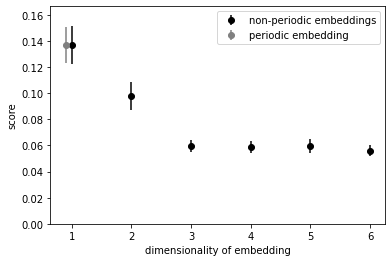

In [7]:
utils.plot_scores(plt.gca(), ai_prentice.scores, ai_prentice.errors)
# plt.savefig("graphs/kp_scores.pdf")
plt.show()

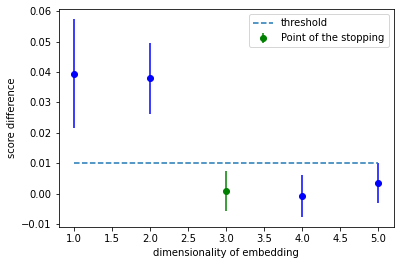

In [8]:
utils.plot_score_diffs(plt.gca(), ai_prentice.scores, ai_prentice.errors, ai_prentice.dimensionality, ai_prentice.threshold)
# plt.savefig("graphs/kp_diffs.pdf")
plt.show()

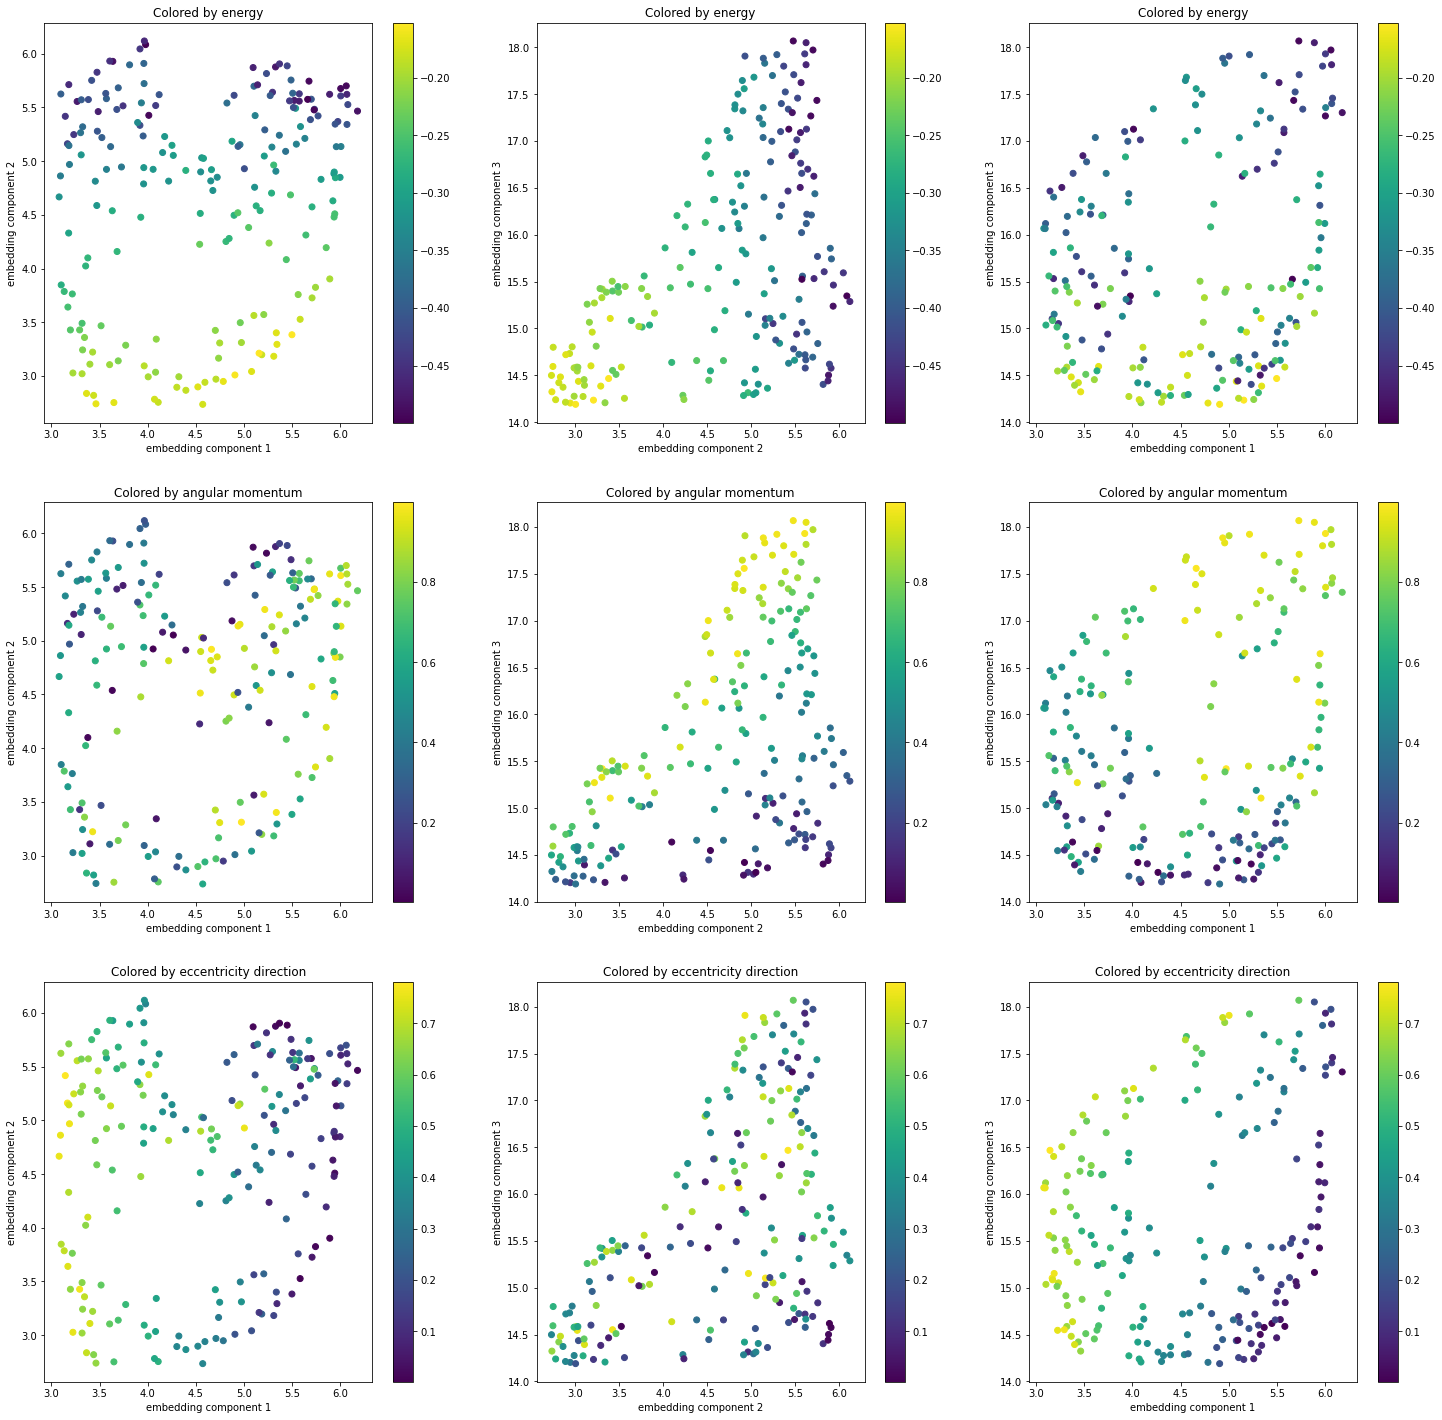

In [9]:
quantities = ["energy", "angular momentum", "eccentricity direction"]
utils.plot_all_3d(*plt.subplots(3, 3, figsize=(25, 25)), embedding, params, quantities)
plt.show()

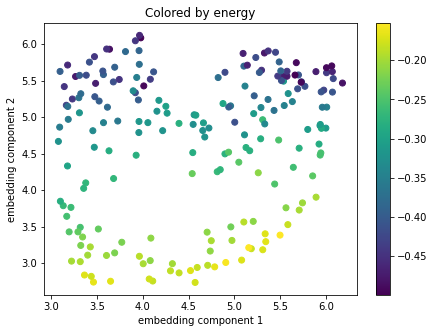

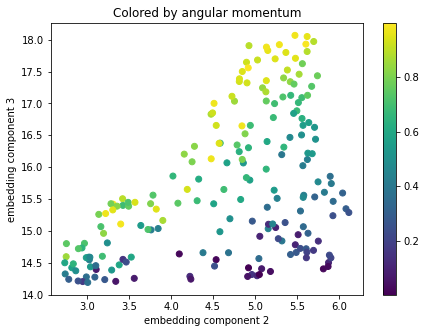

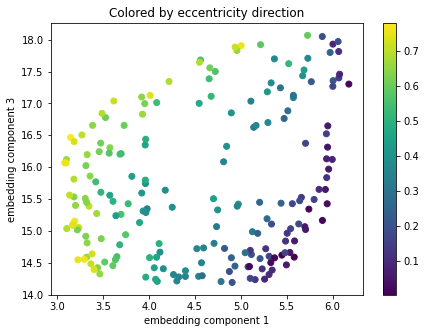

In [10]:
underline = "_"
for (i, j), quantity, quantity_name in zip(utils.choose_coordinates(embedding, params), params.T, quantities):
    utils.plot_2d(*plt.subplots(figsize=(7, 5)), embedding[:, [i, j]], quantity, quantity_name, i + 1, j + 1)
    # plt.savefig(f"graphs/kp_{underline.join(quantity_name.split())}.pdf")
    plt.show()

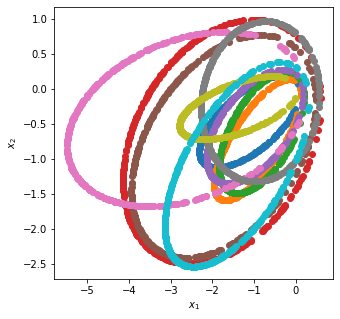

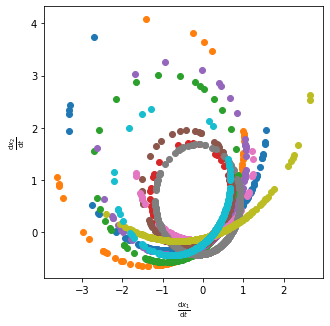

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))

for traj in data[:10]:
    ax.scatter(*traj.T[:2])
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

# plt.savefig("graphs/kp_data1.pdf")
plt.show()

fig, ax = plt.subplots(figsize=(5, 5))


for traj in data[:10]:
    ax.scatter(*traj.T[2:])
ax.set_xlabel("$\\frac{\\mathrm{d}x_1}{\\mathrm{d}t}$")
ax.set_ylabel("$\\frac{\\mathrm{d}x_2}{\\mathrm{d}t}$")

# plt.savefig("graphs/kp_data2.pdf")
plt.show()